# Exam Data

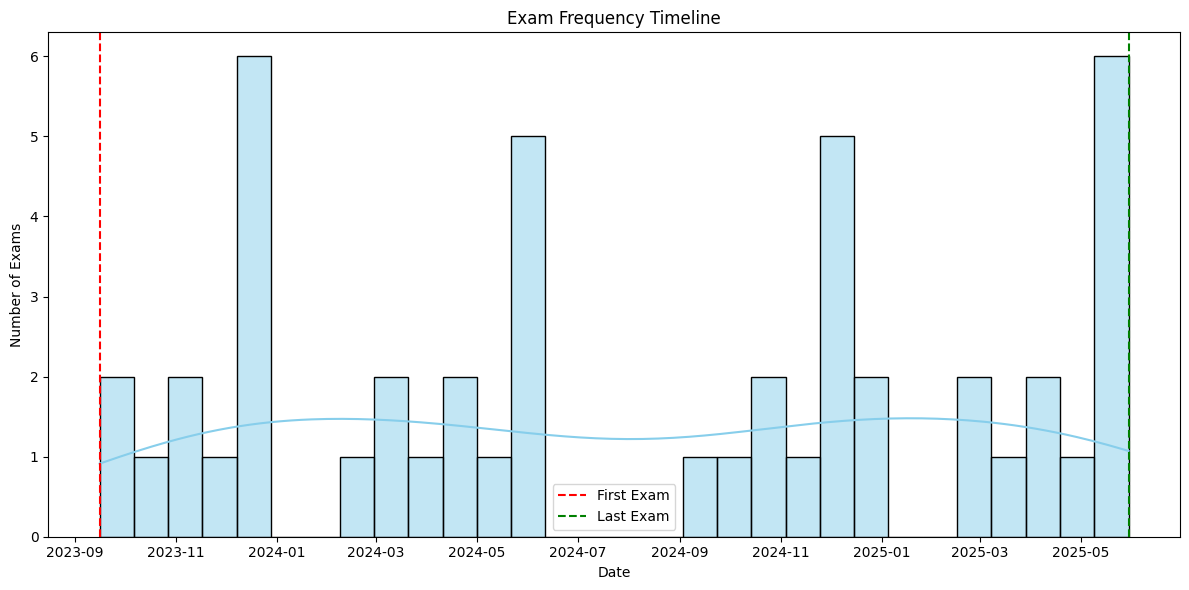

<ipython-input-1-444fac3c5d94>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exam_schedule_df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


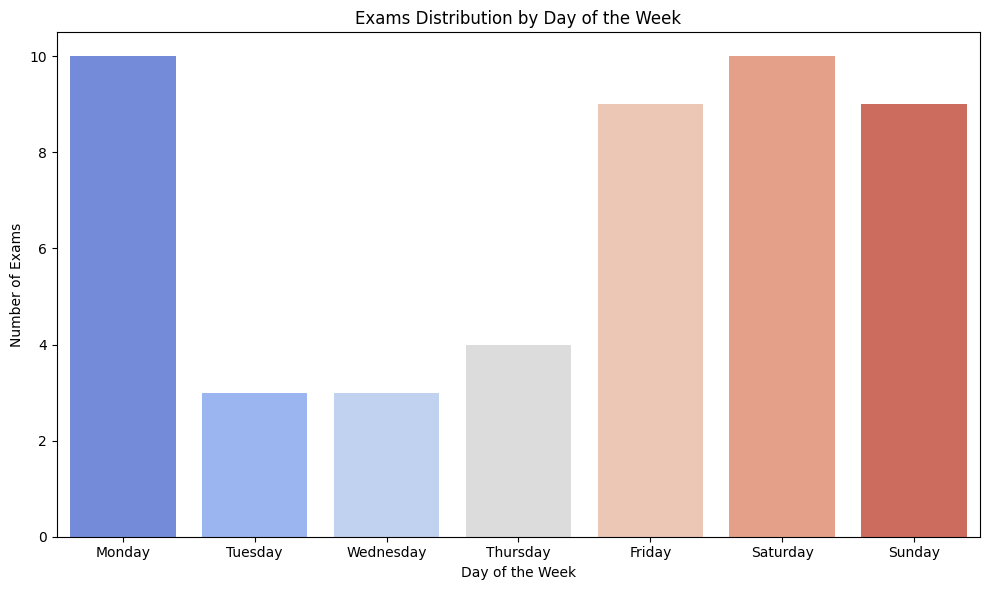

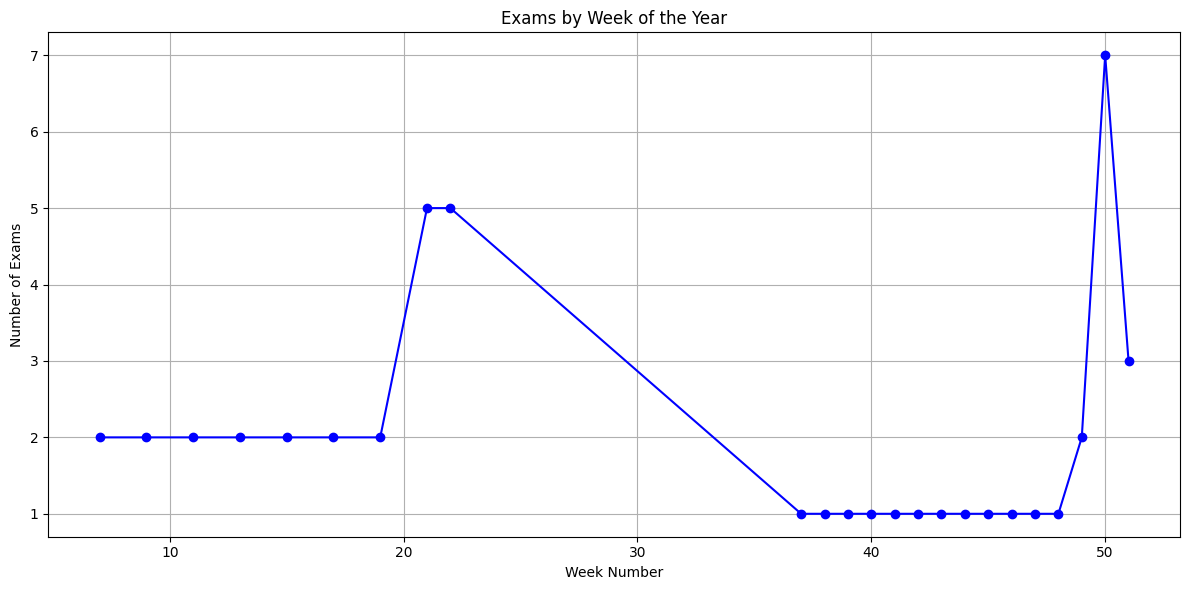

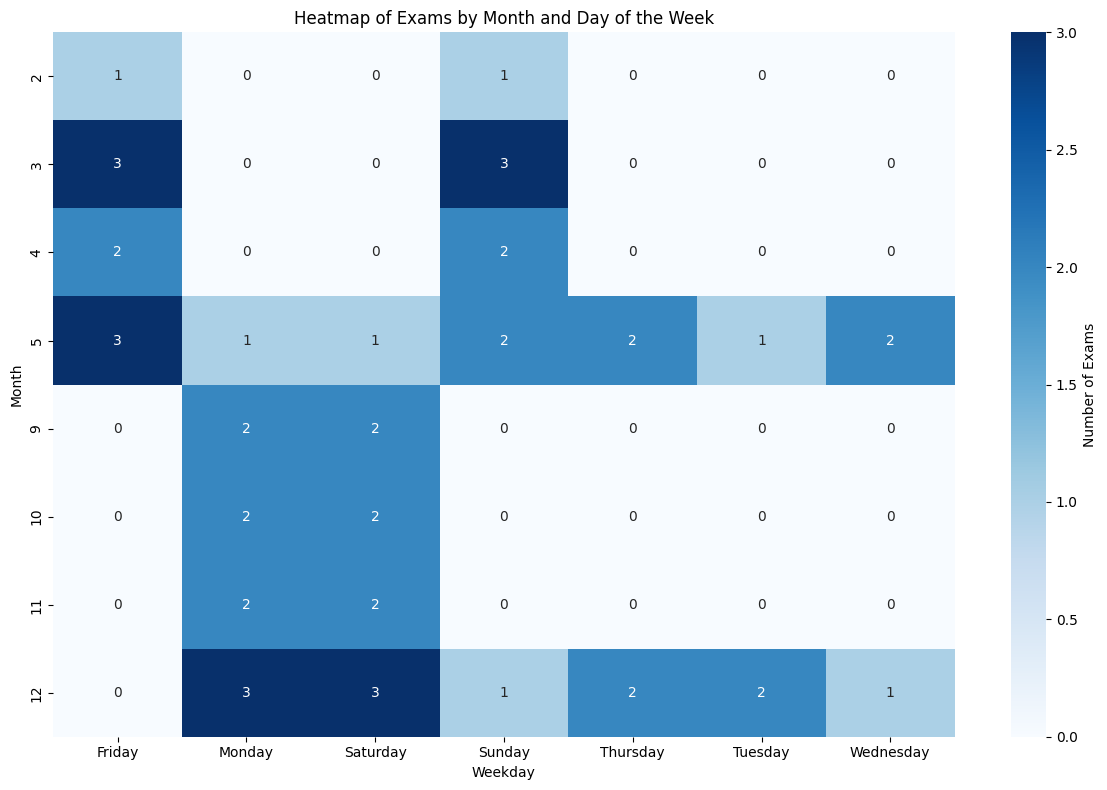

<ipython-input-1-444fac3c5d94>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exam_schedule_df, x='Semester', y=exam_schedule_df['Date'].dt.dayofyear, palette='Set3')


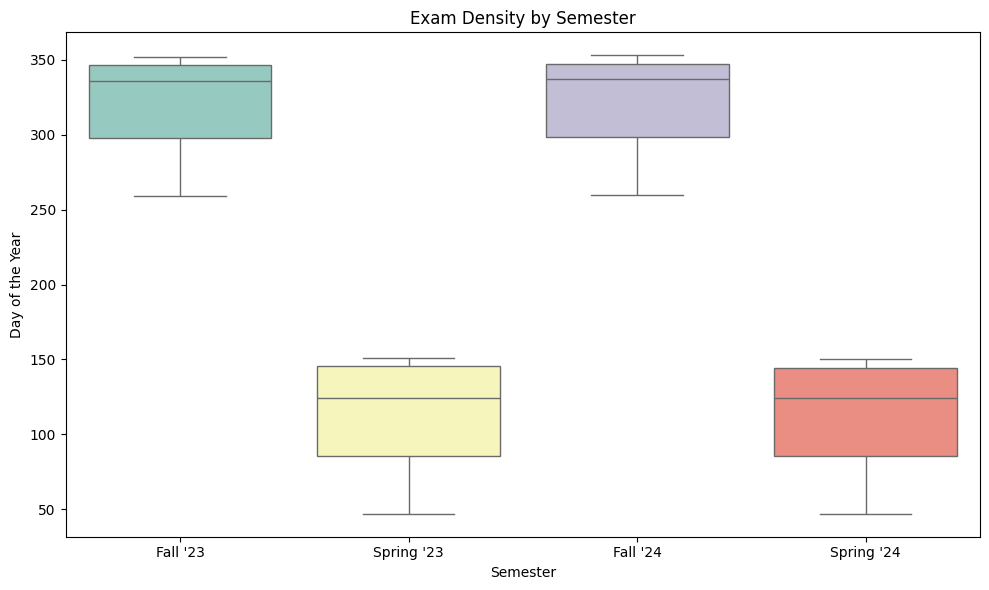

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_name = 'Exam_Schedule_4_Semesters.csv'
exam_schedule_df = pd.read_csv(file_name)

# Convert the 'Date' column to datetime
exam_schedule_df['Date'] = pd.to_datetime(exam_schedule_df['Date'])
exam_schedule_df['Week'] = exam_schedule_df['Date'].dt.isocalendar().week
exam_schedule_df['Day'] = exam_schedule_df['Date'].dt.day_name()

# Highlight Exam Periods
plt.figure(figsize=(12, 6))
sns.histplot(exam_schedule_df['Date'], bins=30, kde=True, color='skyblue')
plt.title('Exam Frequency Timeline')
plt.xlabel('Date')
plt.ylabel('Number of Exams')
plt.axvline(x=exam_schedule_df['Date'].min(), color='red', linestyle='--', label='First Exam')
plt.axvline(x=exam_schedule_df['Date'].max(), color='green', linestyle='--', label='Last Exam')
plt.legend()
plt.tight_layout()
plt.show()

# Weekly Distribution of Exams
plt.figure(figsize=(10, 6))
sns.countplot(data=exam_schedule_df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title('Exams Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Exams')
plt.tight_layout()
plt.show()

# Exam Clusters by Week
weekly_exam_counts = exam_schedule_df.groupby('Week').size()

plt.figure(figsize=(12, 6))
plt.plot(weekly_exam_counts.index, weekly_exam_counts.values, marker='o', linestyle='-', color='blue')
plt.title('Exams by Week of the Year')
plt.xlabel('Week Number')
plt.ylabel('Number of Exams')
plt.grid()
plt.tight_layout()
plt.show()

# Heatmap of Exams by Month and Weekday
exam_schedule_df['Month'] = exam_schedule_df['Date'].dt.month
heatmap_data = pd.crosstab(exam_schedule_df['Month'], exam_schedule_df['Day'], rownames=['Month'], colnames=['Weekday'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Exams'})
plt.title('Heatmap of Exams by Month and Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# Exam Density by Semester
plt.figure(figsize=(10, 6))
sns.boxplot(data=exam_schedule_df, x='Semester', y=exam_schedule_df['Date'].dt.dayofyear, palette='Set3')
plt.title('Exam Density by Semester')
plt.xlabel('Semester')
plt.ylabel('Day of the Year')
plt.tight_layout()
plt.show()




# Spotify Data

In [ ]:
# Find the time interval for exams
time_interval_start = exam_schedule_df['Date'].min()
time_interval_end = exam_schedule_df['Date'].max()
time_interval = time_interval_end - time_interval_start

# Print the time interval details
print("Time Interval:")
print(f"Start: {time_interval_start}")
print(f"End: {time_interval_end}")
print(f"Duration: {time_interval}")

# List of JSON file paths for Spotify data
file_paths = [
    'Streaming_History_Audio_2022-2023_5.json',
    'Streaming_History_Audio_2023-2024_6.json',
    'Streaming_History_Audio_2024_7.json'
]

# Initialize a list to store Spotify data DataFrames
dataframes = []

# Load each JSON file into a DataFrame
for file_path in file_paths:
    try:
        # Read JSON file into a DataFrame
        df = pd.read_json(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)
    except ValueError as e:
        print(f"Error loading {file_path}: {e}")

# Concatenate all Spotify DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the columns of the combined DataFrame
print("Combined Spotify Data Columns:")
print(combined_df.columns)

Time Interval:
Start: 2023-09-16 00:00:00
End: 2025-05-30 00:00:00
Duration: 622 days 00:00:00
Combined Spotify Data Columns:
Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')


In [ ]:
# Convert 'ts' column to datetime and extract the date
combined_df['date'] = pd.to_datetime(combined_df['ts']).dt.date

# Select relevant columns
relevant_columns = [
    'date',
    'master_metadata_track_name',
    'master_metadata_album_artist_name',
    'master_metadata_album_album_name',
    'spotify_track_uri',
    'ms_played'
]

# Filter the DataFrame to keep only relevant columns
filtered_df = combined_df[relevant_columns]

# Rename columns for better readability
filtered_df.rename(columns={
    'ts': 'timestamp',
    'master_metadata_track_name': 'track_name',
    'master_metadata_album_artist_name': 'artist_name',
    'master_metadata_album_album_name': 'album_name',
    'spotify_track_uri': 'track_uri',
    'ms_played': 'played_time_in_ms'
}, inplace=True)

# Display the updated DataFrame
print(filtered_df.head())


         date               track_name      artist_name  \
0  2022-11-10           Senin Yüzünden            Buray   
1  2022-11-10                 Bir Daha    Zeynep Bastık   
2  2022-11-10  Kafam Senden Bile Güzel            Kolpa   
3  2022-11-10   Kırk Yılda Bir Gibisin  Emrah Karaduman   
4  2022-11-10          Sevişmemiz Olay             EDIS   

              album_name                             track_uri  \
0         Senin Yüzünden  spotify:track:2xIC5DmTHaGBL83a9OUXM4   
1             Zeynodisco  spotify:track:01jvXT0DK6mIEpnIvaeqdO   
2  Aşk Ve Hayat Hakkında  spotify:track:0d4rto68XJzcTTzFQQ54eS   
3              Toz Duman  spotify:track:1bDRZpVuQOUx5huTjHP8z9   
4                     An  spotify:track:7kgPBthoIFHFGHHUAHjnGs   

   played_time_in_ms  
0                348  
1               2391  
2               1207  
3                626  
4               4133  


<ipython-input-3-c3c2519bed29>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={


In [ ]:
# Filter the data to include only rows within the specified time interval
filtered_df = filtered_df[
    (filtered_df['date'] >= time_interval_start.date()) &
    (filtered_df['date'] <= time_interval_end.date())
]

# Display the filtered DataFrame and confirm the time range
print(f"Data filtered to time interval: {time_interval_start.date()} to {time_interval_end.date()}")
print(filtered_df)



Data filtered to time interval: 2023-09-16 to 2025-05-30
             date       track_name   artist_name       album_name  \
19574  2023-09-16       BÖLÜM SONU         Güneş       BÖLÜM SONU   
19575  2023-09-16  Promilim Yüksek         cakal  Promilim Yüksek   
19576  2023-09-16          Pofuduk         Ezhel          Pofuduk   
19577  2023-09-16          CUFF IT       Beyoncé      RENAISSANCE   
19578  2023-09-16            Uçkun   Mabel Matiz            Uçkun   
...           ...              ...           ...              ...   
42277  2024-12-23            Keşke         Yalın    Bir Bakmışsın   
42278  2024-12-23  YANKI X İNTİHAR         Simge  YANKI X İNTİHAR   
42279  2024-12-23      ZEHİRLİ GÜL         BLOK3          OBSESIF   
42280  2024-12-23      ELLERİM BOŞ        M Lisa      ELLERİM BOŞ   
42281  2024-12-23   İkimizden Biri  Fatma Turgut   İkimizden Biri   

                                  track_uri  played_time_in_ms  
19574  spotify:track:1W7vixv87ysuAoOKzz0uLE      

In [ ]:
print(filtered_df.tail())

             date       track_name   artist_name       album_name  \
42277  2024-12-23            Keşke         Yalın    Bir Bakmışsın   
42278  2024-12-23  YANKI X İNTİHAR         Simge  YANKI X İNTİHAR   
42279  2024-12-23      ZEHİRLİ GÜL         BLOK3          OBSESIF   
42280  2024-12-23      ELLERİM BOŞ        M Lisa      ELLERİM BOŞ   
42281  2024-12-23   İkimizden Biri  Fatma Turgut   İkimizden Biri   

                                  track_uri  played_time_in_ms  
42277  spotify:track:4g8phMgjFb2RecauuBJXmZ              41473  
42278  spotify:track:0E1hVdXGZu0MoE77bYyjie             151512  
42279  spotify:track:0SwRpscOdj6PBhudNVIGpW             176833  
42280  spotify:track:0Y4mwQ4z0Voplgh7o2OZYm             124000  
42281  spotify:track:7M9KPD0b04Z1rxJNGERuAe              42601  


In [ ]:
# Calculate total playtime in minutes for each day
filtered_df['total_play_time_minutes'] = filtered_df['played_time_in_ms'] / 60000  # Convert milliseconds to minutes

# Group by date and sum the playtime
daily_total_playtime = filtered_df.groupby('date')['total_play_time_minutes'].sum().reset_index()

# Rename the column for clarity
daily_total_playtime.rename(columns={'total_play_time_minutes': 'total_play_time_minutes'}, inplace=True)


print(daily_total_playtime)


           date  total_play_time_minutes
0    2023-09-16                22.015533
1    2023-09-18                79.726283
2    2023-09-19                65.300767
3    2023-09-20                43.200433
4    2023-09-21                50.525800
..          ...                      ...
411  2024-12-17                 6.420933
412  2024-12-18               216.924867
413  2024-12-20                26.460767
414  2024-12-21                40.626483
415  2024-12-23                95.049733

[416 rows x 2 columns]


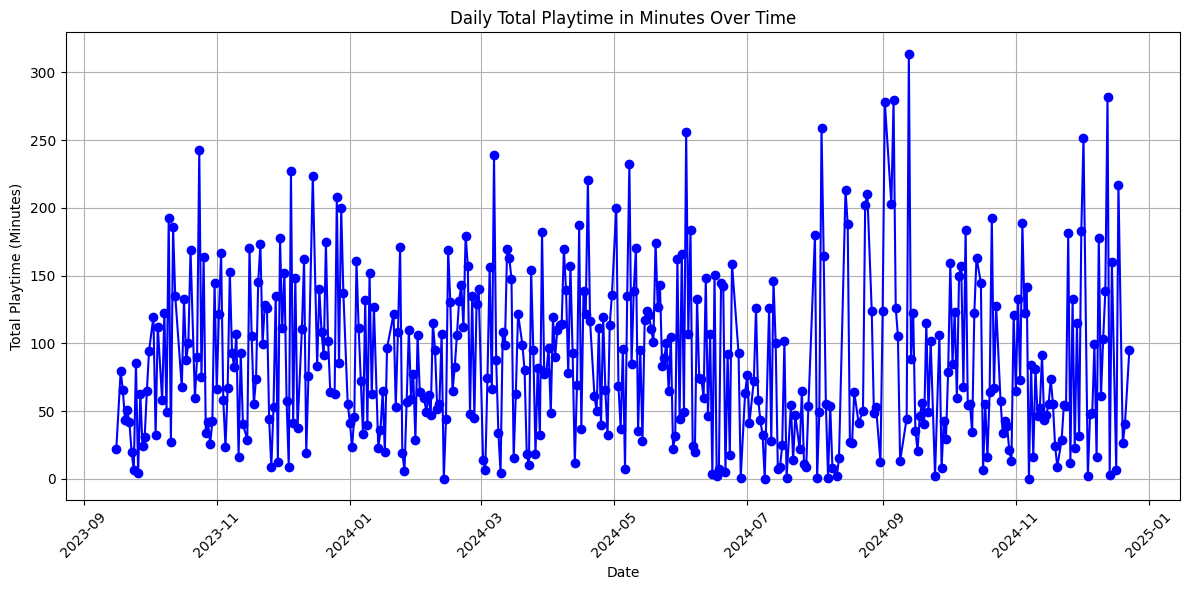

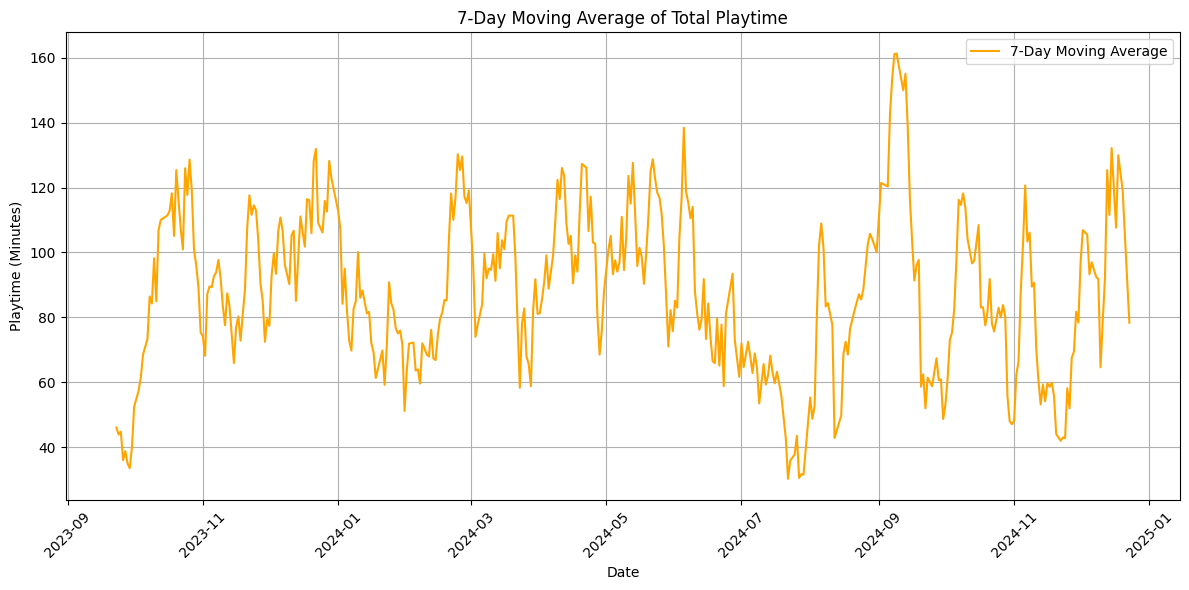

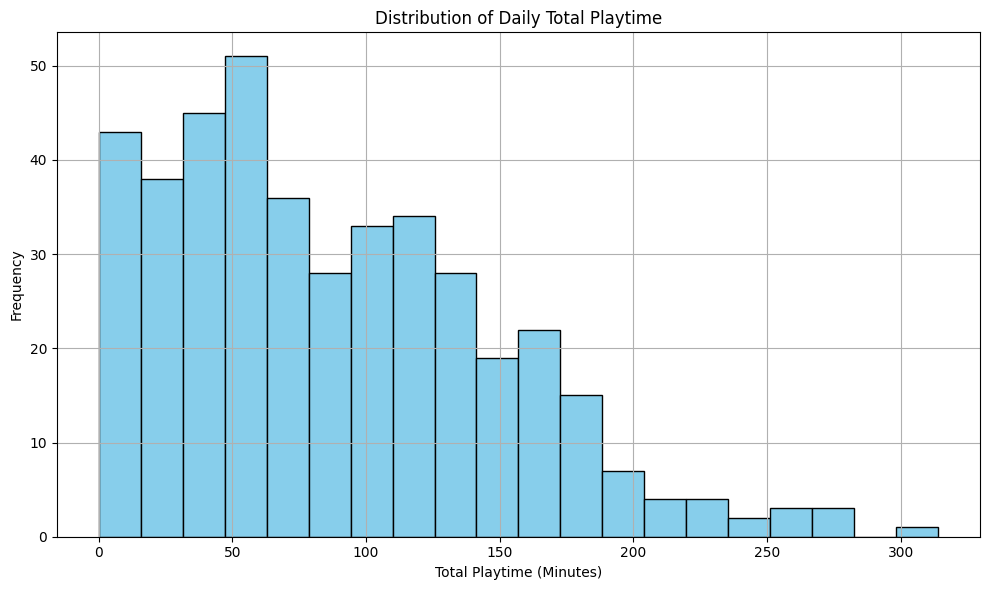

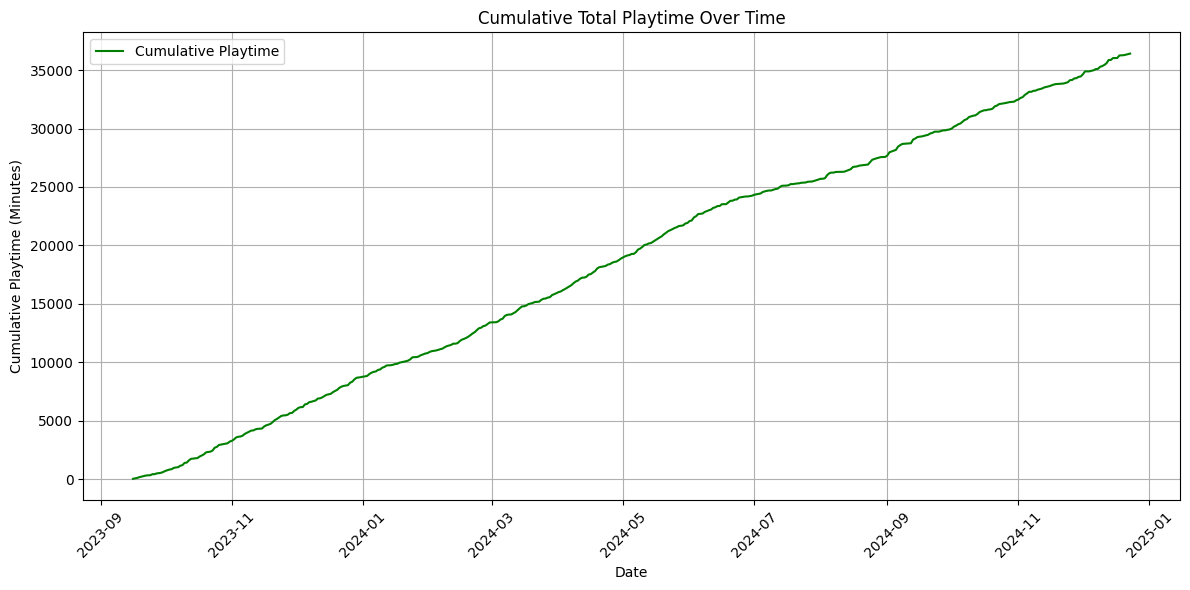

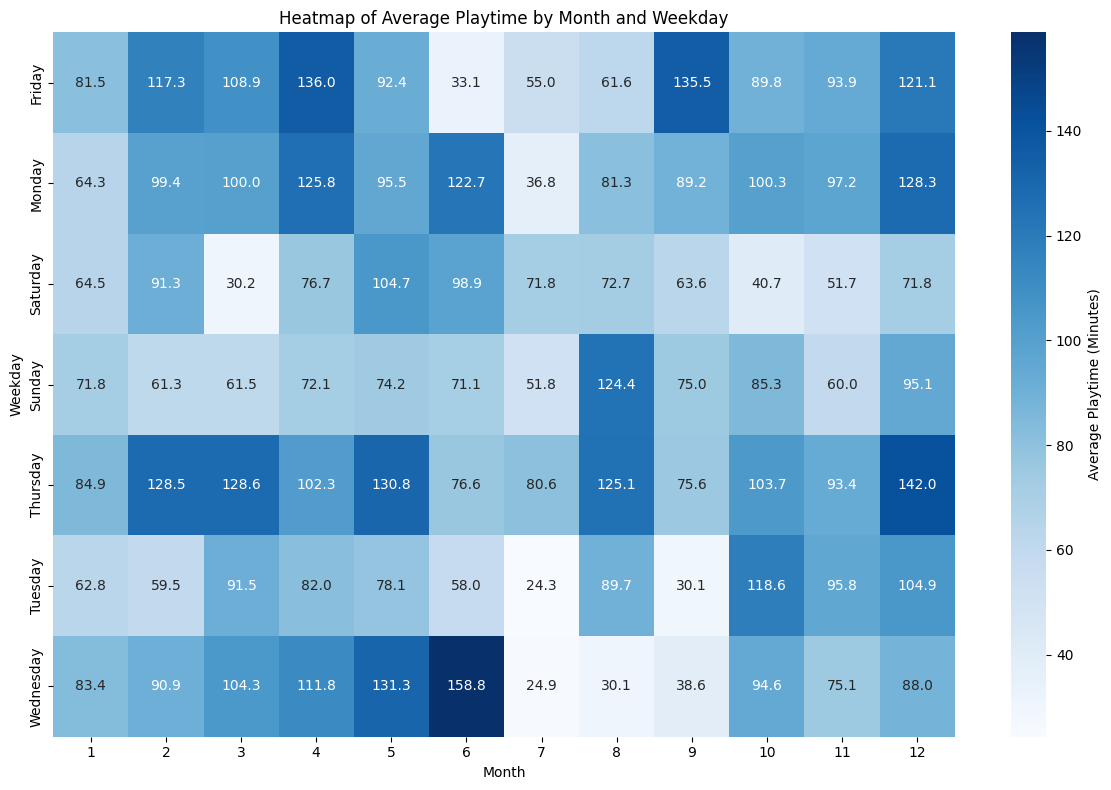

In [ ]:
# Ensure 'date' is in datetime format
daily_total_playtime['date'] = pd.to_datetime(daily_total_playtime['date'])

# 1. Daily Total Playtime Over Time
plt.figure(figsize=(12, 6))
plt.plot(daily_total_playtime['date'], daily_total_playtime['total_play_time_minutes'], marker='o', linestyle='-', color='blue')
plt.title('Daily Total Playtime in Minutes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Playtime (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Weekly Moving Average of Playtime
daily_total_playtime['7_day_avg_playtime'] = daily_total_playtime['total_play_time_minutes'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_total_playtime['date'], daily_total_playtime['7_day_avg_playtime'], color='orange', label='7-Day Moving Average')
plt.title('7-Day Moving Average of Total Playtime')
plt.xlabel('Date')
plt.ylabel('Playtime (Minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Playtime Distribution
plt.figure(figsize=(10, 6))
plt.hist(daily_total_playtime['total_play_time_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Total Playtime')
plt.xlabel('Total Playtime (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Cumulative Total Playtime Over Time
daily_total_playtime['cumulative_playtime'] = daily_total_playtime['total_play_time_minutes'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(daily_total_playtime['date'], daily_total_playtime['cumulative_playtime'], color='green', label='Cumulative Playtime')
plt.title('Cumulative Total Playtime Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Playtime (Minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Heatmap of Playtime by Month and Day of the Week
daily_total_playtime['month'] = daily_total_playtime['date'].dt.month
daily_total_playtime['weekday'] = daily_total_playtime['date'].dt.day_name()

heatmap_data = daily_total_playtime.pivot_table(values='total_play_time_minutes', index='weekday', columns='month', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='Blues', cbar_kws={'label': 'Average Playtime (Minutes)'})
plt.title('Heatmap of Average Playtime by Month and Weekday')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


# Future Work - Looking for Connection btw them

In [ ]:
exam_schedule_df.head()

,Semester,Course,Exam Type,Date,Week,Day,Month
0,Fall '23,ECON 202,Midterm 1,2023-09-16,37,Saturday,9
1,Fall '23,ENS 205,Midterm 1,2023-09-30,39,Saturday,9
2,Fall '23,HUM 202,Midterm 2,2023-10-14,41,Saturday,10
3,Fall '23,IE 311,Midterm 1,2023-10-28,43,Saturday,10
4,Fall '23,MATH 306,Midterm 1,2023-11-11,45,Saturday,11


In [ ]:
daily_total_playtime.head()

,date,total_play_time_minutes,7_day_avg_playtime,cumulative_playtime,month,weekday
0,2023-09-16,22.015533,NaN,22.015533,9,Saturday
1,2023-09-18,79.726283,NaN,101.741817,9,Monday
2,2023-09-19,65.300767,NaN,167.042583,9,Tuesday
3,2023-09-20,43.200433,NaN,210.243017,9,Wednesday
4,2023-09-21,50.525800,NaN,260.768817,9,Thursday


In [ ]:
daily_total_playtime_df = daily_total_playtime.copy()

In [ ]:
# Ensure 'date' column in both dataframes is in datetime format
exam_schedule_df['Date'] = pd.to_datetime(exam_schedule_df['Date'])
daily_total_playtime_df['date'] = pd.to_datetime(daily_total_playtime_df['date'])

# Add a column indicating whether the date is an exam date
daily_total_playtime_df['is_exam_day'] = daily_total_playtime_df['date'].isin(exam_schedule_df['Date'])

# Add a column for days until the next exam
daily_total_playtime_df['days_until_next_exam'] = daily_total_playtime_df['date'].apply(
    lambda x: (exam_schedule_df['Date'] - x).dt.days.min() if not exam_schedule_df.empty else np.nan
)

# Preview the updated daily playtime dataframe
print(daily_total_playtime_df.head())


        date  total_play_time_minutes  7_day_avg_playtime  \
0 2023-09-16                22.015533                 NaN   
1 2023-09-18                79.726283                 NaN   
2 2023-09-19                65.300767                 NaN   
3 2023-09-20                43.200433                 NaN   
4 2023-09-21                50.525800                 NaN   

   cumulative_playtime  month    weekday  is_exam_day  days_until_next_exam  
0            22.015533      9   Saturday         True                     0  
1           101.741817      9     Monday        False                    -2  
2           167.042583      9    Tuesday        False                    -3  
3           210.243017      9  Wednesday        False                    -4  
4           260.768817      9   Thursday        False                    -5  


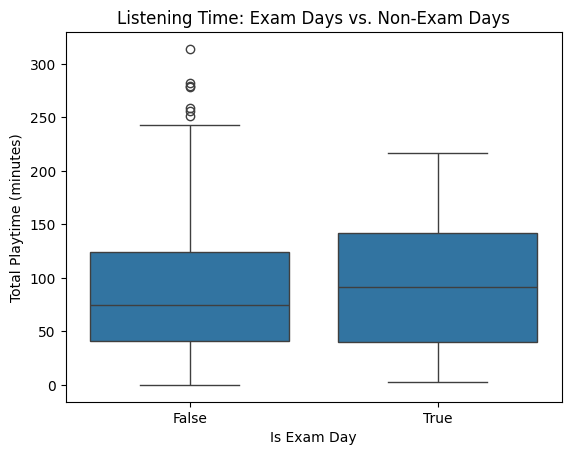

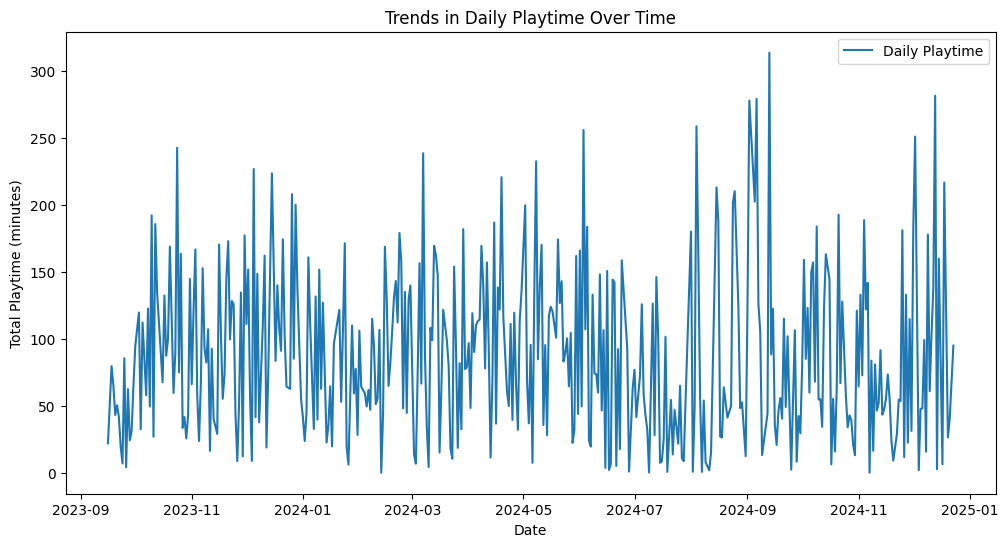

In [ ]:
# Group data by whether it's an exam day
sns.boxplot(data=daily_total_playtime_df, x='is_exam_day', y='total_play_time_minutes')
plt.title("Listening Time: Exam Days vs. Non-Exam Days")
plt.xlabel("Is Exam Day")
plt.ylabel("Total Playtime (minutes)")
plt.show()

# Plot playtime trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_total_playtime_df, x='date', y='total_play_time_minutes', label='Daily Playtime')
plt.title("Trends in Daily Playtime Over Time")
plt.xlabel("Date")
plt.ylabel("Total Playtime (minutes)")
plt.legend()
plt.show()


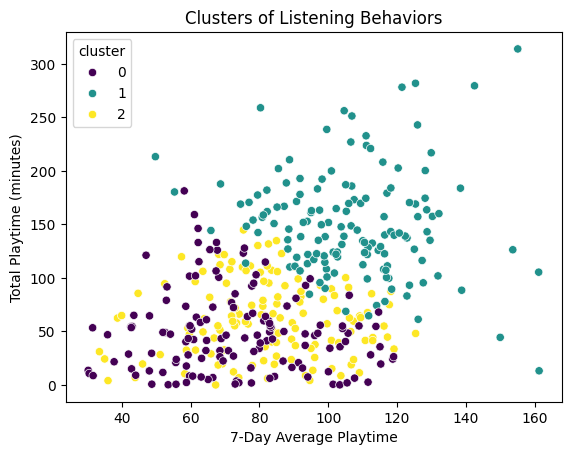

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = daily_total_playtime_df[['total_play_time_minutes', '7_day_avg_playtime', 'cumulative_playtime']].fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
daily_total_playtime_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(data=daily_total_playtime_df, x='7_day_avg_playtime', y='total_play_time_minutes', hue='cluster', palette='viridis')
plt.title("Clusters of Listening Behaviors")
plt.xlabel("7-Day Average Playtime")
plt.ylabel("Total Playtime (minutes)")
plt.show()


Average Playtime by Cluster:
cluster
0     49.238948
1    150.295015
2     60.785221
Name: total_play_time_minutes, dtype: float64


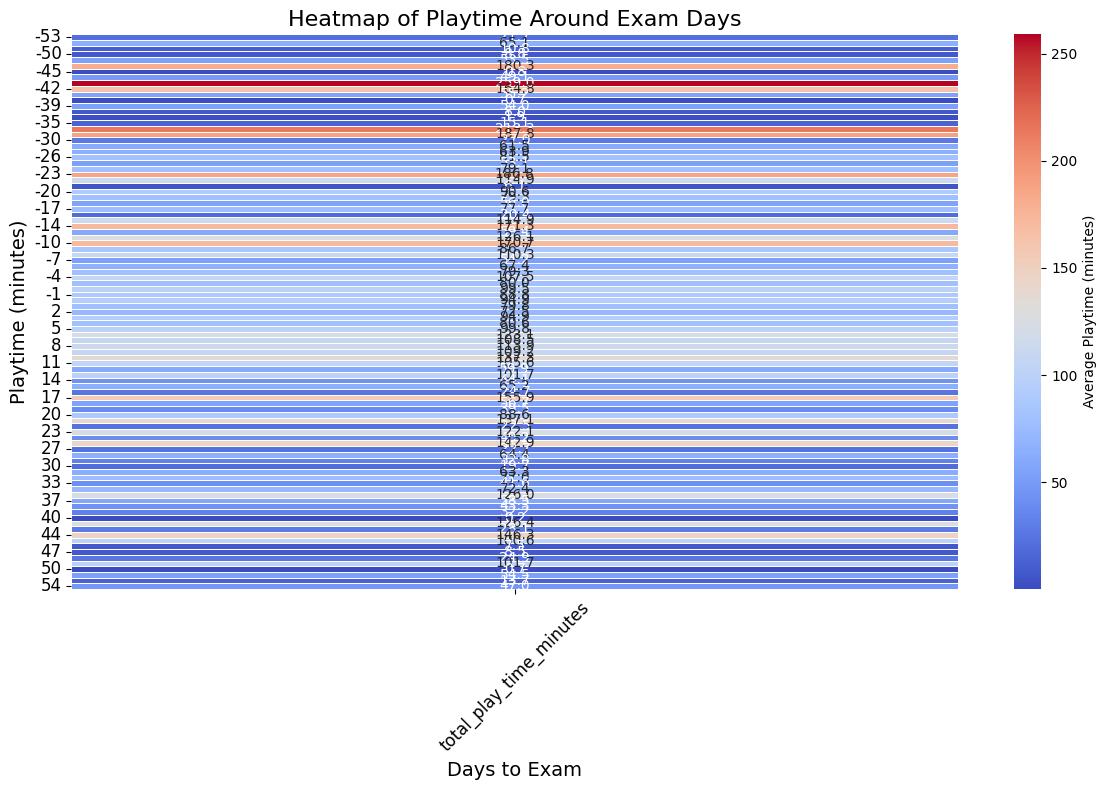

In [ ]:
# Calculate average playtime by cluster
cluster_means = daily_total_playtime_df.groupby('cluster')['total_play_time_minutes'].mean()
print("Average Playtime by Cluster:")
print(cluster_means)

# Add 'days_to_exam' calculation
exam_dates = exam_schedule_df['Date'].tolist()
daily_total_playtime_df['days_to_exam'] = daily_total_playtime_df['date'].apply(
    lambda x: min([(x - exam_date).days for exam_date in exam_dates], key=abs) if exam_dates else np.nan
)

# Create pivot table for playtime around exam days
pivot_data = daily_total_playtime_df.pivot_table(
    index='days_to_exam', values='total_play_time_minutes', aggfunc='mean'
)

# Plot the heatmap with improved visualization
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(
    pivot_data,
    cmap='coolwarm',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Average Playtime (minutes)'}
)

# Add titles and labels
plt.title("Heatmap of Playtime Around Exam Days", fontsize=16)
plt.xlabel("Days to Exam", fontsize=14)
plt.ylabel("Playtime (minutes)", fontsize=14)

# Customize axis ticks
plt.xticks(fontsize=12, rotation=45)  # Rotate labels if needed
plt.yticks(fontsize=12)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


## T-Test
Objective: Compare mean playtime on exam days vs. non-exam days to check for significant differences.



In [ ]:
from scipy.stats import ttest_ind

# Split data into exam days and non-exam days
exam_day_playtime = daily_total_playtime_df[daily_total_playtime_df['is_exam_day'] == True]['total_play_time_minutes']
non_exam_day_playtime = daily_total_playtime_df[daily_total_playtime_df['is_exam_day'] == False]['total_play_time_minutes']

# Perform independent t-test
t_stat, p_value = ttest_ind(exam_day_playtime, non_exam_day_playtime, nan_policy='omit')

# Results
print("T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant difference in playtime between exam and non-exam days.")
else:
    print("Conclusion: No statistically significant difference in playtime between exam and non-exam days.")


T-Test Results:
T-Statistic: 0.6792
P-Value: 0.4974
Conclusion: No statistically significant difference in playtime between exam and non-exam days.


<ipython-input-22-1e07aee6c5f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_total_playtime_df, x='is_exam_day', y='total_play_time_minutes', palette='Set2')


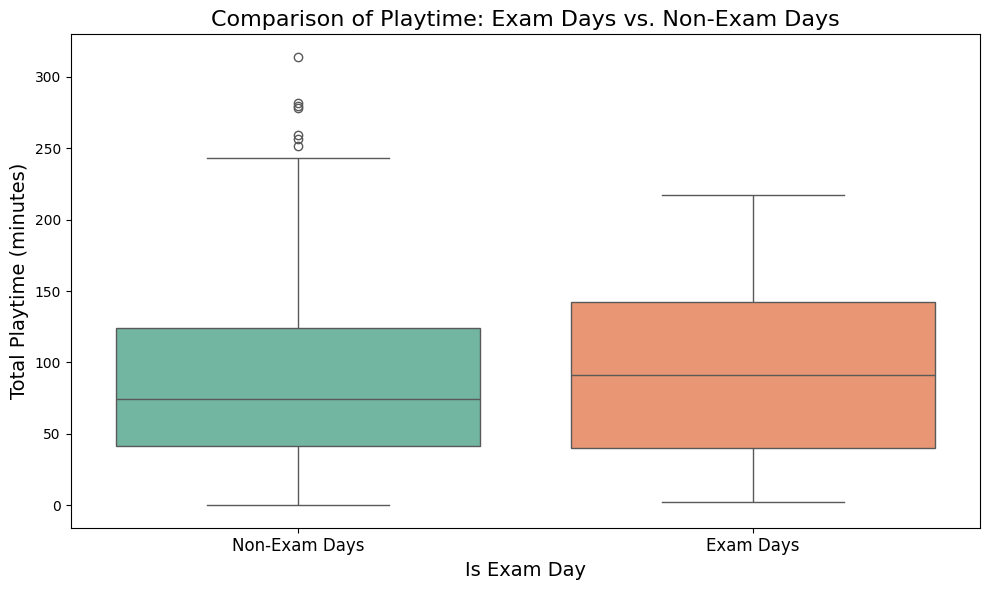

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to compare playtime on exam days vs. non-exam days
plt.figure(figsize=(10, 6))
sns.boxplot(data=daily_total_playtime_df, x='is_exam_day', y='total_play_time_minutes', palette='Set2')

# Add labels and title
plt.title('Comparison of Playtime: Exam Days vs. Non-Exam Days', fontsize=16)
plt.xlabel('Is Exam Day', fontsize=14)
plt.ylabel('Total Playtime (minutes)', fontsize=14)
plt.xticks([0, 1], ['Non-Exam Days', 'Exam Days'], fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


### **T-Test Analysis and Interpretation**

The t-test was conducted to determine whether there is a statistically significant difference in average playtime between exam days and non-exam days.

#### **Results**
- **T-Statistic**: 0.6792  
- **P-Value**: 0.4974  
- **Conclusion**: Since the p-value (0.4974) is greater than the standard significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in the mean playtime between exam days and non-exam days.

#### **Visualization**
The boxplot above visually supports this conclusion:
- The distributions of playtime on exam days and non-exam days show considerable overlap.
- The median playtime (horizontal lines in each box) is similar for both groups.
- While there are a few outliers in playtime on non-exam days, the overall range and interquartile range are comparable.

#### **Practical Implications**
These findings suggest that my music listening habits, in terms of total playtime, are not significantly affected by exam days. This implies that I might have consistent listening habits, regardless of high-stress periods such as exams.


## Chi-Square Test
Objective: Test if the frequency of high vs. low playtime significantly differs between exam and non-exam days.



In [ ]:
from scipy.stats import chi2_contingency

# Categorize playtime into "High" and "Low" based on median
median_playtime = daily_total_playtime_df['total_play_time_minutes'].median()
daily_total_playtime_df['playtime_category'] = daily_total_playtime_df['total_play_time_minutes'].apply(
    lambda x: 'High' if x > median_playtime else 'Low'
)

# Create a contingency table
contingency_table = pd.crosstab(daily_total_playtime_df['is_exam_day'], daily_total_playtime_df['playtime_category'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant association between exam days and playtime categories.")
else:
    print("Conclusion: No significant association between exam days and playtime categories.")



Chi-Square Test Results:
Chi-Square Statistic: 0.0359
P-Value: 0.8497
Degrees of Freedom: 1
Conclusion: No significant association between exam days and playtime categories.


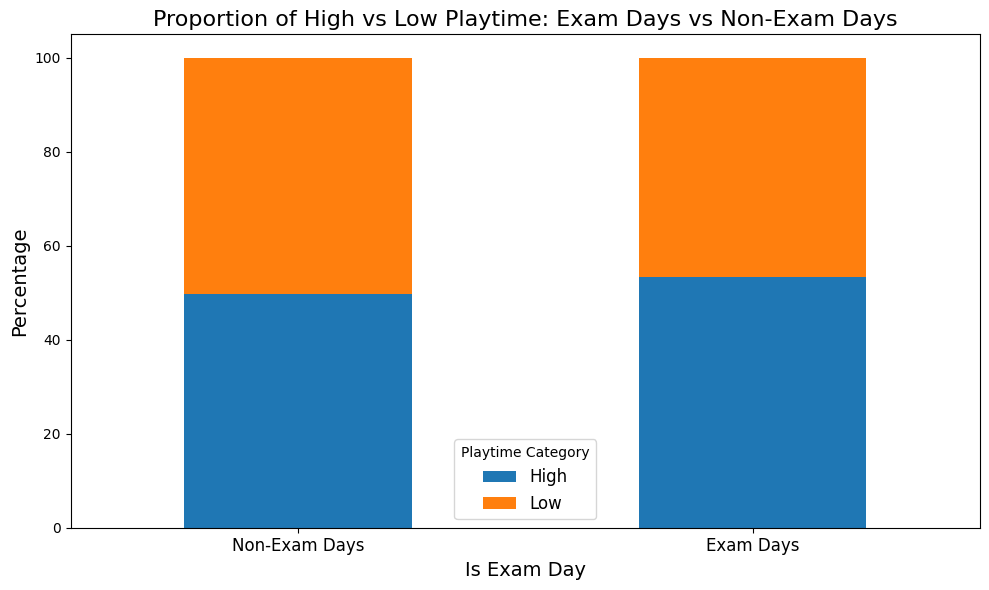

In [ ]:
# Visualize contingency table as a stacked bar chart
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Plot
contingency_table_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.title('Proportion of High vs Low Playtime: Exam Days vs Non-Exam Days', fontsize=16)
plt.xlabel('Is Exam Day', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Non-Exam Days', 'Exam Days'], rotation=0, fontsize=12)
plt.legend(title='Playtime Category', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


### **Chi-Square Test Analysis and Interpretation**

The Chi-Square test was conducted to assess whether there is a statistically significant association between exam days and playtime categories ("High" or "Low").

#### **Results**
- **Chi-Square Statistic**: 0.0359  
- **P-Value**: 0.8497  
- **Degrees of Freedom**: 1  
- **Conclusion**: Since the p-value (0.8497) is much greater than the standard significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no significant association between exam days and whether the playtime falls into the "High" or "Low" category.

#### **Visualization**
The stacked bar chart above visually supports this conclusion:
- The proportions of "High" and "Low" playtime are very similar for both exam days and non-exam days.
- For non-exam days, approximately half the data is "High" playtime and half is "Low" playtime. The same pattern holds for exam days.
- There are no substantial differences between the two groups.

#### **Practical Implications**
These findings suggest that my likelihood of listening to "High" or "Low" amounts of music does not vary based on whether it is an exam day or not. This implies that my music listening habits, in terms of volume (categorized as "High" or "Low"), are consistent regardless of high-stress periods such as exams.


## Pearson Correlation
Objective: Examine the correlation between days_to_exam and total_play_time_minutes.

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
correlation, p_value = pearsonr(daily_total_playtime_df['days_to_exam'].dropna(), daily_total_playtime_df['total_play_time_minutes'].dropna())

# Results
print("\nPearson Correlation Results:")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: There is a statistically significant correlation between days to exam and total playtime.")
else:
    print("Conclusion: No significant correlation between days to exam and total playtime.")



Pearson Correlation Results:
Correlation Coefficient: -0.0444
P-Value: 0.3664
Conclusion: No significant correlation between days to exam and total playtime.


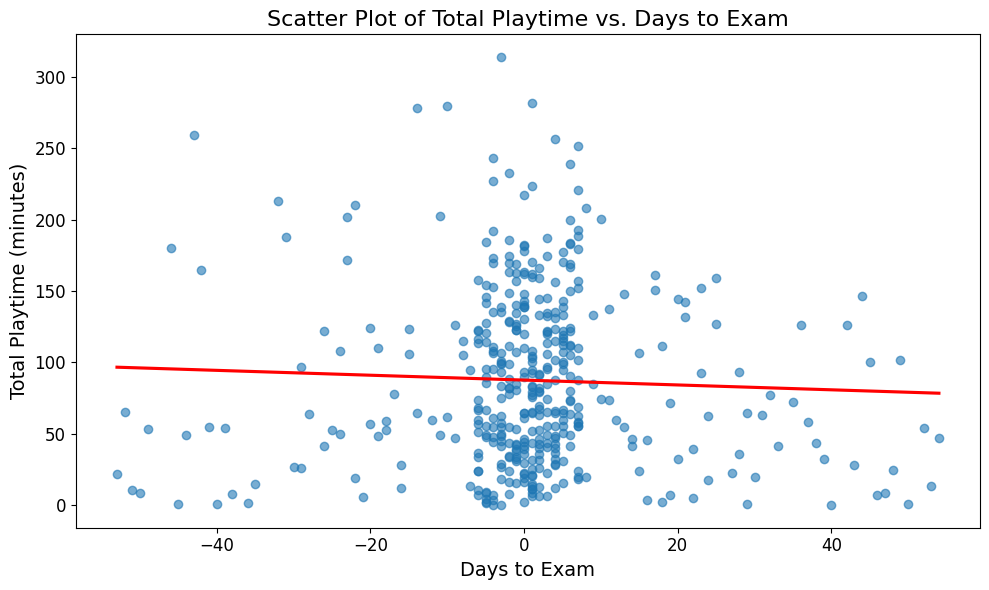

In [ ]:
# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='days_to_exam',
    y='total_play_time_minutes',
    data=daily_total_playtime_df,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)

# Add labels and title
plt.title('Scatter Plot of Total Playtime vs. Days to Exam', fontsize=16)
plt.xlabel('Days to Exam', fontsize=14)
plt.ylabel('Total Playtime (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


### **Pearson Correlation Analysis and Interpretation**

The Pearson correlation was conducted to examine the relationship between `days_to_exam` and `total_play_time_minutes`.

#### **Results**
- **Correlation Coefficient**: -0.0444  
- **P-Value**: 0.3664  
- **Conclusion**: Since the p-value (0.3664) is greater than the standard significance level of 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant correlation between `days_to_exam` and `total_play_time_minutes`.

#### **Visualization**
The scatter plot above visually supports this conclusion:
- The points are widely scattered, with no clear trend or pattern visible between `days_to_exam` and `total_play_time_minutes`.
- The regression line (red) is nearly flat, which corresponds to the weak correlation value (-0.0444), indicating little to no linear relationship between the two variables.

#### **Practical Implications**
These findings suggest that my total playtime does not have a meaningful or consistent relationship with the proximity of exams. This implies that the days leading up to or following exams do not strongly influence the amount of time I spend listening to music.


## Regression Analysis
Objective: Model the relationship between days_to_exam and total_play_time_minutes.

In [ ]:
import statsmodels.api as sm

# Regression Model: Predict total playtime based on days_to_exam
regression_data = daily_total_playtime_df.dropna(subset=['days_to_exam', 'total_play_time_minutes'])
X = regression_data['days_to_exam']
y = regression_data['total_play_time_minutes']

# Add constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display results
print("\nRegression Analysis Results:")
print(model.summary())



Regression Analysis Results:
                               OLS Regression Results                              
Dep. Variable:     total_play_time_minutes   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.8177
Date:                     Fri, 10 Jan 2025   Prob (F-statistic):              0.366
Time:                             08:53:52   Log-Likelihood:                -2300.9
No. Observations:                      416   AIC:                             4606.
Df Residuals:                          414   BIC:                             4614.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

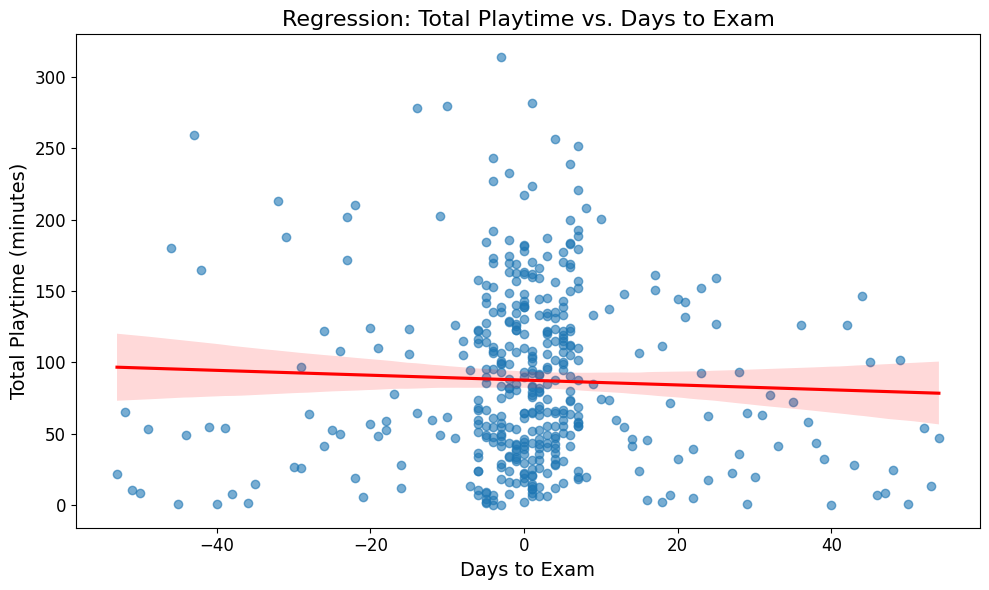

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='days_to_exam',
    y='total_play_time_minutes',
    data=regression_data,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

# Add labels and title
plt.title('Regression: Total Playtime vs. Days to Exam', fontsize=16)
plt.xlabel('Days to Exam', fontsize=14)
plt.ylabel('Total Playtime (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

### **Regression Analysis and Interpretation**

The regression analysis was conducted to evaluate the relationship between `days_to_exam` and `total_play_time_minutes`. The results from the regression model and the corresponding visualization are detailed below.

#### **Regression Results**
- **Dependent Variable**: `total_play_time_minutes`
- **Independent Variable**: `days_to_exam`
- **R-squared**: 0.002  
  - This indicates that only 0.2% of the variance in `total_play_time_minutes` can be explained by `days_to_exam`. This is an extremely low value, showing a very weak relationship.
- **Adjusted R-squared**: -0.000  
  - This confirms that adding the variable `days_to_exam` does not improve the model's explanatory power.
- **Coefficient for `days_to_exam`**: -0.1701  
  - The negative coefficient suggests a slight decrease in total playtime as the number of days to an exam increases. However, this effect is negligible.
- **P-value for `days_to_exam`**: 0.366  
  - Since the p-value is greater than 0.05, the relationship between `days_to_exam` and `total_play_time_minutes` is not statistically significant.
- **Intercept**: 87.6907  
  - This represents the average playtime when `days_to_exam` is 0.

#### **Visualization**
The scatter plot with the regression line visually supports the regression results:
- The **scatter plot** shows a wide spread of data points with no clear linear trend between `days_to_exam` and `total_play_time_minutes`.
- The **regression line** (red) is nearly flat, indicating that changes in `days_to_exam` have minimal impact on playtime.
- The **confidence interval** (shaded area) around the regression line is quite wide, further reinforcing the lack of a strong relationship.

#### **Practical Implications**
These findings suggest that:
1. The proximity to exams does not have a meaningful or consistent impact on total music playtime.
2. Music listening habits appear to remain relatively stable, regardless of how close or far a I am from an exam day.

#### **Conclusion**
Based on the R-squared value (0.002) and the insignificant p-value (0.366), we conclude that `days_to_exam` is not a good predictor of `total_play_time_minutes`. This aligns with the scatter plot, which visually demonstrates the absence of a strong or significant relationship.
